In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load/

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-symptom-description-dataset/symptom_Description.csv
/kaggle/input/disease-symptom-description-dataset/Symptom-severity.csv
/kaggle/input/disease-symptom-description-dataset/symptom_precaution.csv
/kaggle/input/disease-symptom-description-dataset/dataset.csv
/kaggle/input/data-sample-feynn/data_sample.csv
/kaggle/input/data-sample-fy/data_sample.csv


In [94]:
dataset= pd.read_csv('/kaggle/input/disease-symptom-description-dataset/dataset.csv')
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
dataset['Disease'].nunique()

41

In [96]:
df=dataset

In [97]:
symptom_columns = df.columns[1:]  # Exclude the first column (Disease)
unique_symptoms = df[symptom_columns].values.ravel().tolist()
unique_symptoms = list(set(unique_symptoms))
unique_symptoms


[' irritation_in_anus',
 ' neck_pain',
 ' coma',
 ' chest_pain',
 ' slurred_speech',
 ' painful_walking',
 ' blister',
 ' runny_nose',
 ' mood_swings',
 ' altered_sensorium',
 ' yellow_urine',
 ' muscle_weakness',
 ' movement_stiffness',
 ' weakness_in_limbs',
 ' indigestion',
 ' weight_loss',
 ' pus_filled_pimples',
 ' loss_of_smell',
 ' watering_from_eyes',
 ' receiving_unsterile_injections',
 ' ulcers_on_tongue',
 ' swollen_legs',
 ' breathlessness',
 ' stomach_pain',
 ' swollen_blood_vessels',
 ' dehydration',
 ' loss_of_balance',
 ' pain_behind_the_eyes',
 ' palpitations',
 ' unsteadiness',
 ' small_dents_in_nails',
 ' dischromic _patches',
 ' blackheads',
 ' high_fever',
 ' stomach_bleeding',
 ' toxic_look_(typhos)',
 ' muscle_wasting',
 ' bladder_discomfort',
 ' inflammatory_nails',
 ' sinus_pressure',
 ' family_history',
 ' abnormal_menstruation',
 ' cough',
 ' sweating',
 ' puffy_face_and_eyes',
 ' cold_hands_and_feets',
 ' congestion',
 ' spinning_movements',
 ' distention_of

In [98]:
for symptom in unique_symptoms:
    df[symptom] = df[symptom_columns].apply(lambda row: int(symptom in row.values), axis=1)
df.drop(symptom_columns, axis=1, inplace=True)



In [99]:
df.columns


Index([                 'Disease',      ' irritation_in_anus',
                     ' neck_pain',                    ' coma',
                    ' chest_pain',          ' slurred_speech',
               ' painful_walking',                 ' blister',
                    ' runny_nose',             ' mood_swings',
       ...
              ' passage_of_gases',                 ' acidity',
                        'itching',         ' blood_in_sputum',
           ' acute_liver_failure', ' prominent_veins_on_calf',
                    ' stiff_neck',                  ' chills',
           ' swollen_extremeties',      ' increased_appetite'],
      dtype='object', length=133)

In [100]:
for column in df.columns[1:]:
    new_column_name = str(column).lstrip()  # Convert column name to string before applying lstrip
    df.rename(columns={column: new_column_name}, inplace=True)

In [101]:
#Removing nan
if 'nan' in df.columns:
    df = df.drop('nan', axis=1)
    

In [102]:
# #merging same disease symptom in 1 row
# consolidated_df = df.groupby('Disease').max().reset_index()

# # print(consolidated_df)
# consolidated_df.tail()

In [103]:
#loading final df
df.to_csv("processed_data.csv", index=False)
final_df= pd.read_csv('/kaggle/working/processed_data.csv')

In [104]:
final_df.shape

(4920, 132)

In [105]:
X=final_df.iloc[:,1:].values
X.shape

(4920, 131)

In [106]:
y=final_df.iloc[:,0].values
y.shape

(4920,)

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [108]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

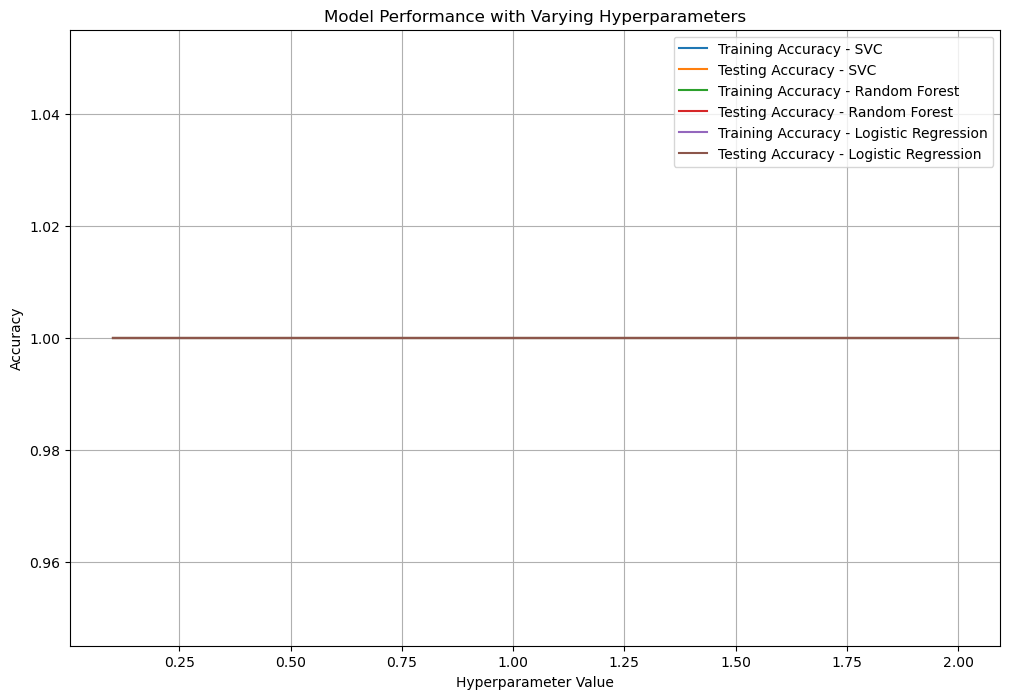

In [109]:
# Initialize an array to store accuracy values for each model
models = [SVC, RandomForestClassifier, LogisticRegression]
model_names = ['SVC', 'Random Forest', 'Logistic Regression']

# Vary hyperparameters for each model
hyperparameters = [
    {'C': 0.1, 'kernel': 'linear'},
    {'n_estimators': 50, 'max_depth': 10, 'random_state': 42},
    {'C': 0.1, 'max_iter': 100}
]

plt.figure(figsize=(12, 8))

for model, model_name, params in zip(models, model_names, hyperparameters):
    train_accuracies = []
    test_accuracies = []
    
    # Vary hyperparameter values
    param_values = np.linspace(0.1, 2, 10)
    
    for value in param_values:
        # Create the model with varying hyperparameters
        clf = model(**params)
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict on training and testing sets
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        # Calculate accuracy
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    plt.plot(param_values, train_accuracies, label=f'Training Accuracy - {model_name}')
    plt.plot(param_values, test_accuracies, label=f'Testing Accuracy - {model_name}')

plt.xlabel('Hyperparameter Value')
plt.ylabel('Accuracy')
plt.title('Model Performance with Varying Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()

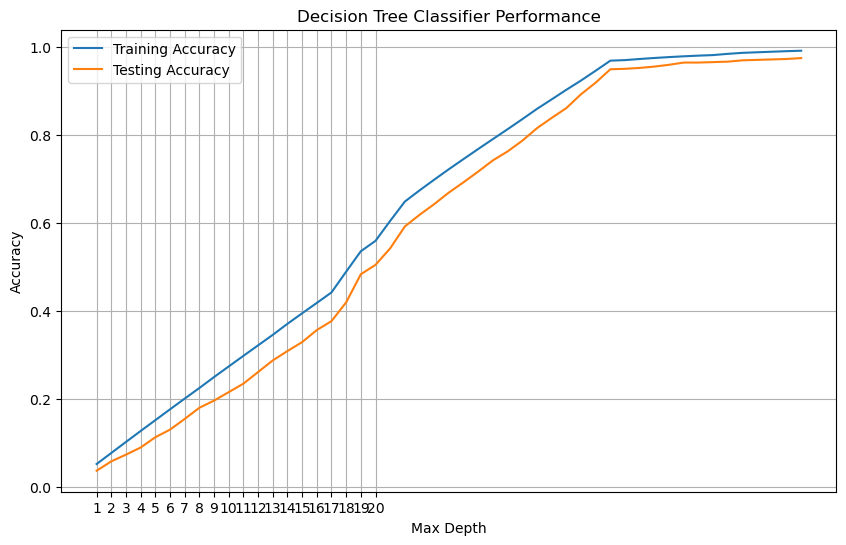

In [110]:
#uSING DECISION TREE

# Initialize an array to store accuracy values
train_accuracies = []
test_accuracies = []
depths = range(1, 50)  # Vary the depth from 1 to 20

# Train Decision Trees with different depths
for depth in depths:
    # Create the Decision Tree classifier
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on training and testing sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, test_accuracies, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Performance')
plt.legend()
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()

In [111]:
# TESTING (this should come)
X_test[4] , y_test[4] 

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 'Chronic cholestasis')

In [112]:
# Model Output
classifier.predict(X_test[4].reshape(1,131))

array(['Chronic cholestasis'], dtype=object)

In [113]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.975609756097561


In [130]:
spd=pd.read_csv('/kaggle/input/data-sample-fy/data_sample.csv')
spd.head()

,Total_Customers,Average_Purchase_Value,Purchase_Frequency,Customer_Lifespan,Customer_Acquisition_Cost,Churn_Rate,Net_Profit_Margin,ROI,Conversion_Rate,Customer_Retention_Cost
0,1000,3650,2,24,7300,0.1,15,20,5,2190


# Bar plot for all columns


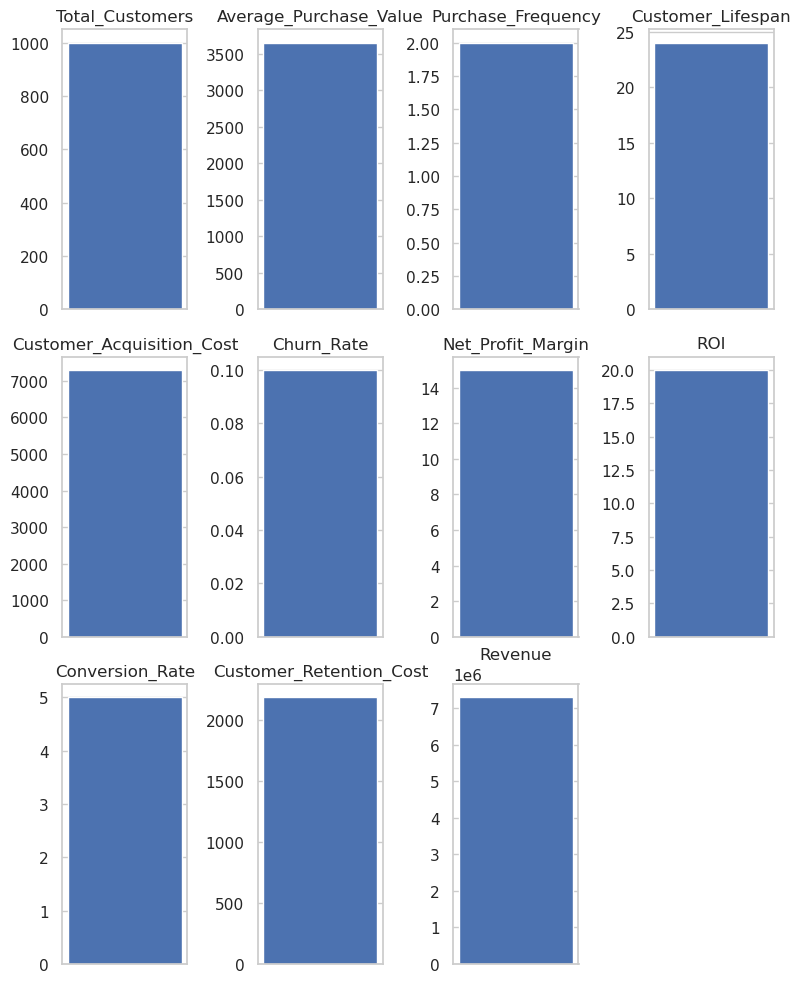

In [144]:
plt.figure(figsize=(8, 10))
for i, column in enumerate(spd.columns):
    plt.subplot(3, 4, i + 1)
    plt.bar([0], spd[column].iloc[0], width=0.4, label=column)
    plt.title(column)
    plt.xticks([])

plt.tight_layout()
plt.show()

# 1.Customer Distribution by Purchase Frequency:


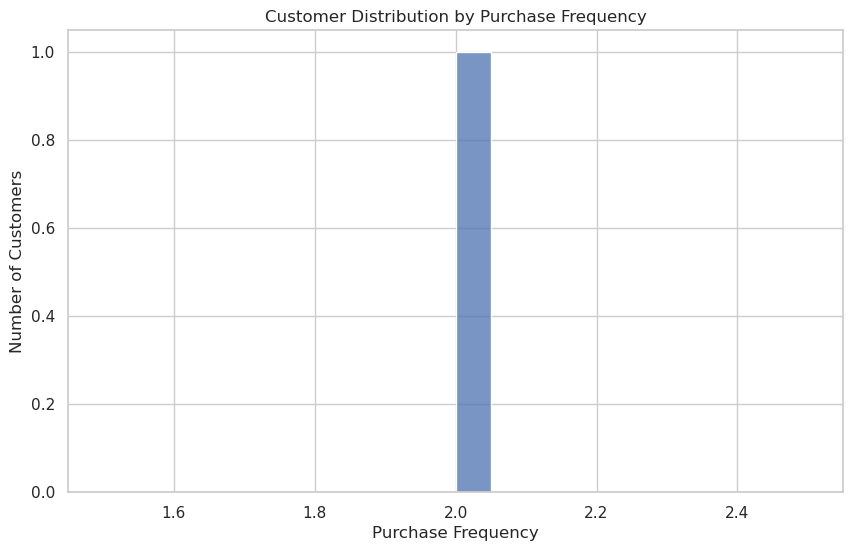

In [132]:
plt.figure(figsize=(10, 6))
sns.histplot(spd['Purchase_Frequency'], bins=20, kde=False)
plt.title('Customer Distribution by Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.show()


# 2. Customer Acquisition Cost vs. Customer Retention Cost:


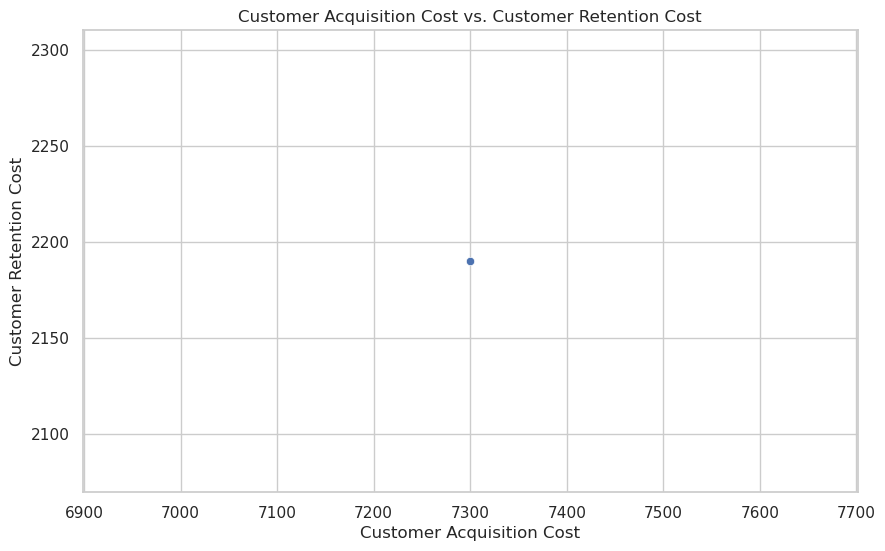

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Acquisition_Cost', y='Customer_Retention_Cost', data=spd)
plt.title('Customer Acquisition Cost vs. Customer Retention Cost')
plt.xlabel('Customer Acquisition Cost')
plt.ylabel('Customer Retention Cost')
plt.show()


# 3. Churn Rate Analysis:


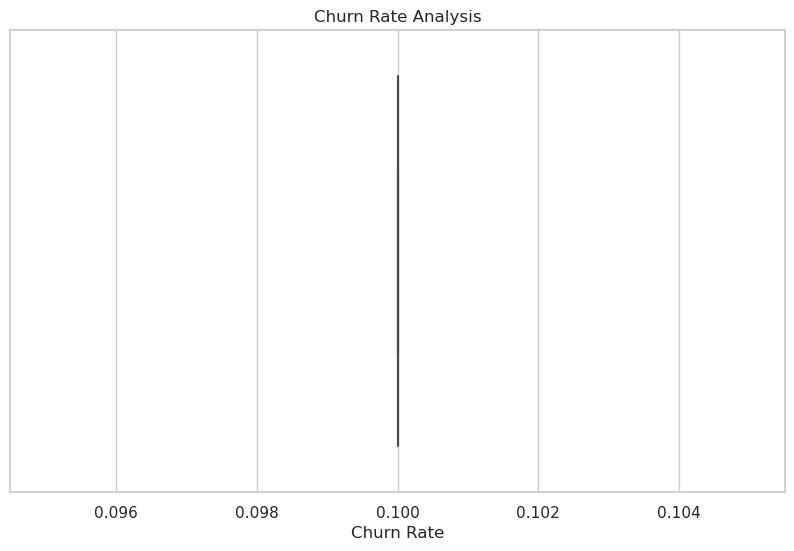

In [134]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Rate', data=spd)
plt.title('Churn Rate Analysis')
plt.xlabel('Churn Rate')
plt.show()


# 4. Revenue Analysis:


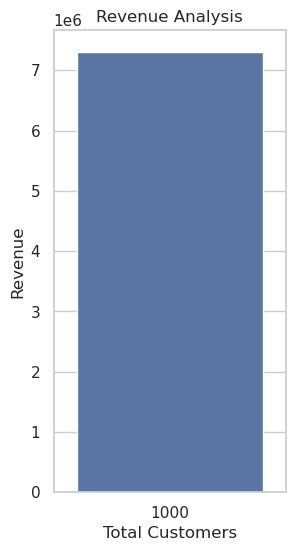

In [136]:
revenue = spd['Average_Purchase_Value'] * spd['Purchase_Frequency'] * spd['Total_Customers']
spd['Revenue'] = revenue

plt.figure(figsize=(3, 6))
sns.barplot(x='Total_Customers', y='Revenue', data=spd)
plt.title('Revenue Analysis')
plt.xlabel('Total Customers')
plt.ylabel('Revenue')
plt.show()
